In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import pandas as pd
from crawto.CrawtoDS import CrawtoDS

In [4]:
df = pd.read_csv("train.csv")
test= pd.read_csv("test.csv")
c = CrawtoDS(
    data=df,
    test_data=test,
    target="Survived",
    problem='binary classification'
)

In [5]:
c.nan_report()

,Percent of data encoded NAN
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


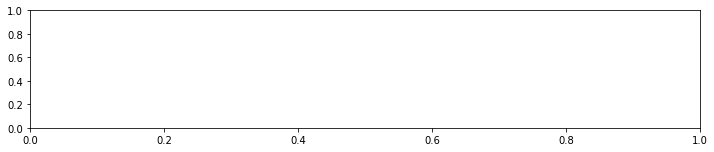

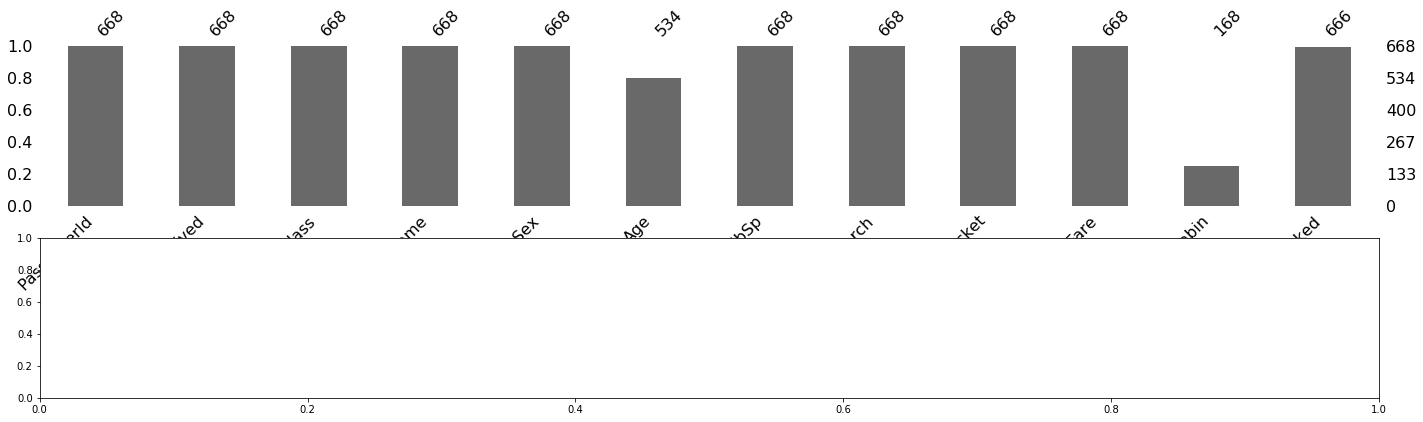

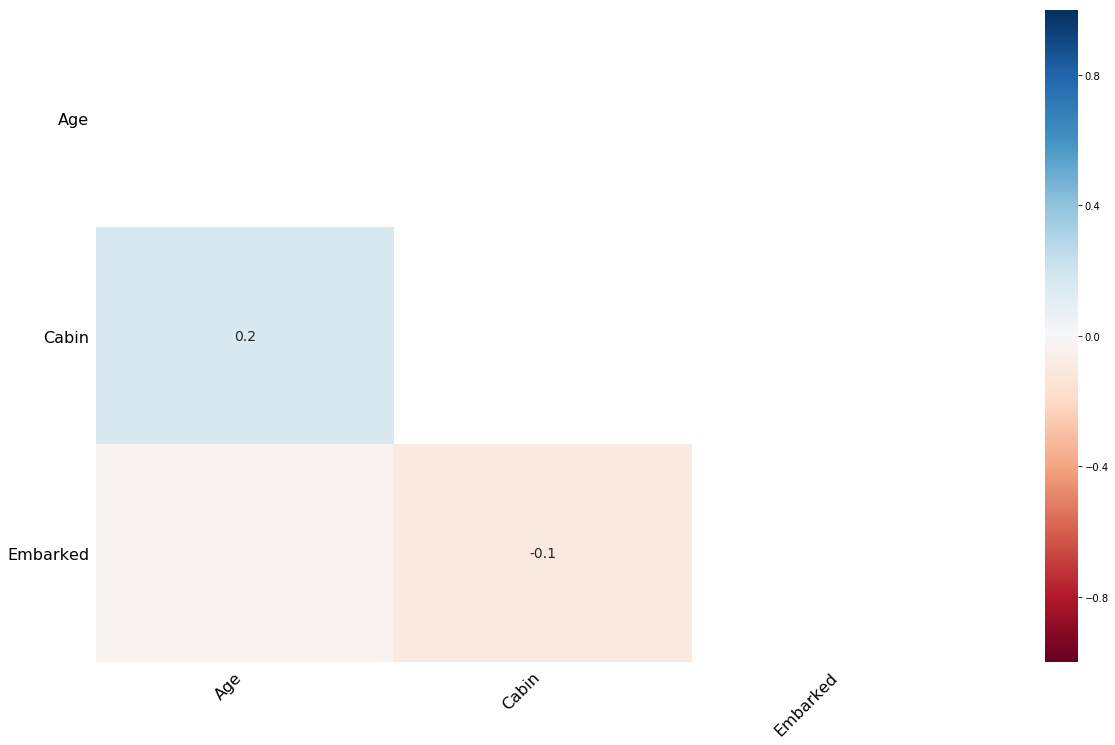

In [6]:
c.missing_suite()

In [7]:
c.skew_report()

There are 0 highly skewed data columns. Please check them for miscoded na's
[]


'No Features are correlated above the threshold'

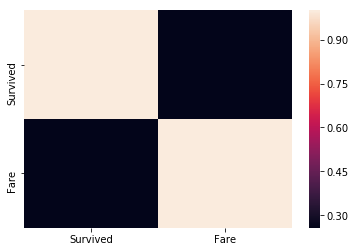

In [8]:
c.correlation_report()

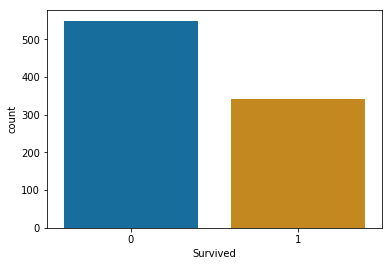

In [9]:
c.target_distribution_report()

In [10]:
c.tsne()

AttributeError: 'CrawtoDS' object has no attribute 'tsne'

In [ ]:
#c.categorical_bar_plots()

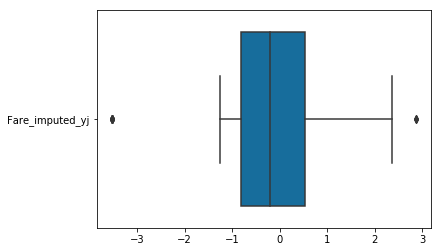

In [11]:
c.numeric_boxplot()

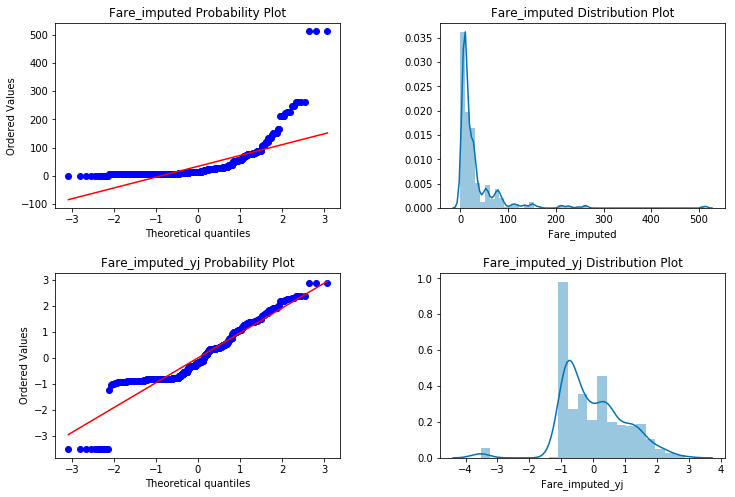

In [12]:
c.probability_plots()

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       137
           1       0.00      0.00      0.00        86

    accuracy                           0.61       223
   macro avg       0.31      0.50      0.38       223
weighted avg       0.38      0.61      0.47       223



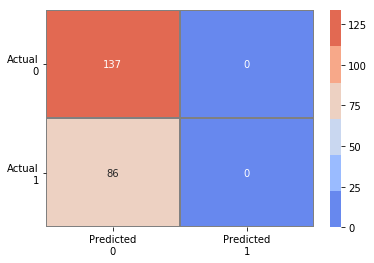

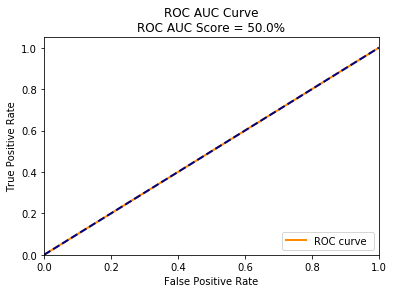

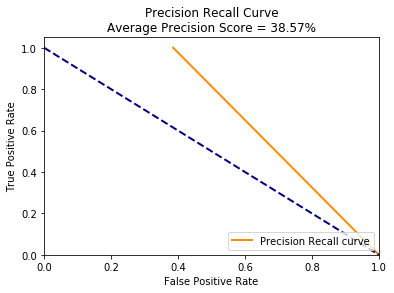

In [13]:
c.baseline_prediction()

In [149]:
 p= c.transformed_regression()

In [150]:
p.display

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       137
           1       0.61      0.62      0.61        86

    accuracy                           0.70       223
   macro avg       0.68      0.68      0.68       223
weighted avg       0.70      0.70      0.70       223



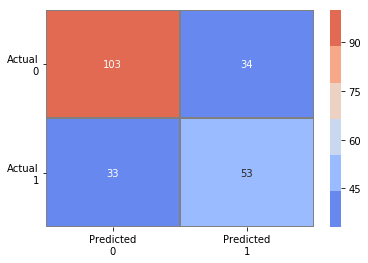

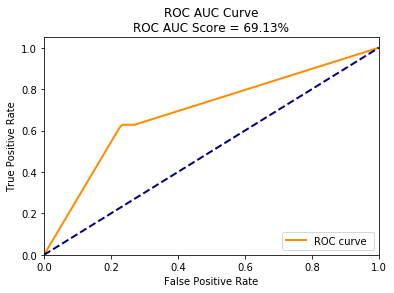

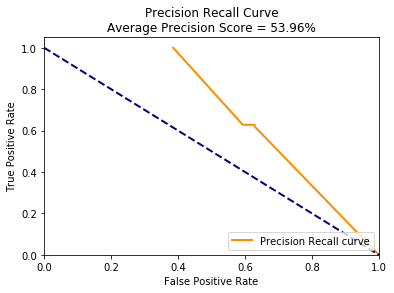

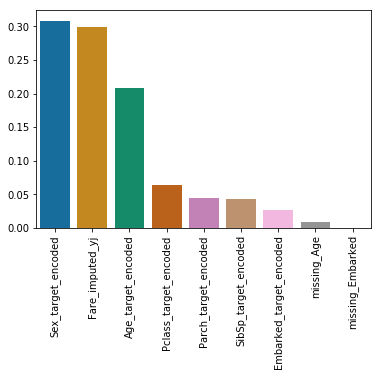

In [146]:
c.transformed_decision_tree()

In [ ]:
c.transformed_random_forest()

In [ ]:
c.transformed_gradient_booster()

In [ ]:
list(zip(c.train_transformed_data.columns,c._transformed_svm.coef_[0]))

In [ ]:
c.transformed_svm()

In [ ]:
c.test_transformed_data